In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

# PreProcessing
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv(r"D:\Machine Learning Projects\JamboreeEducation-LinearRegression\Jamboree_Admission.csv",low_memory=False)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# check the Dataset Size
df.shape

(500, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# check the missing values in dataset
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# check the duplicates in Dataset
df.duplicated().sum()

np.int64(0)

In [ ]:
# statstcal summary of numerical columns
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [34]:
# drop the Serial No as it does not provive an information
df.drop(columns=['Serial No.'], inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Exploratoty Data Analysis

#### Univariate Analysis

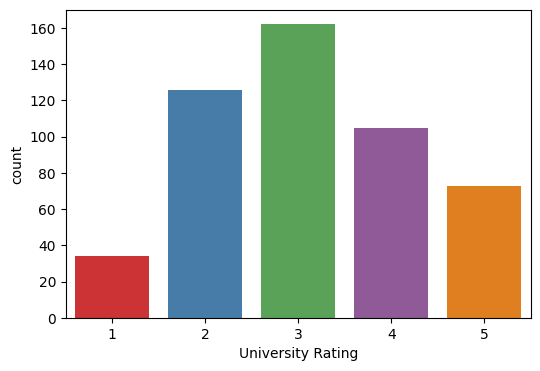

In [ ]:
# University Rating Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='University Rating', palette='Set1')
plt.show()

##### Few Univesities are with rank 1 and most of them are between 2 and 4

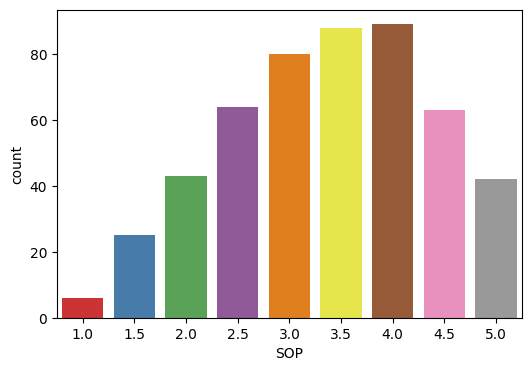

In [ ]:
# SOP Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='SOP', palette='Set1')
plt.show()

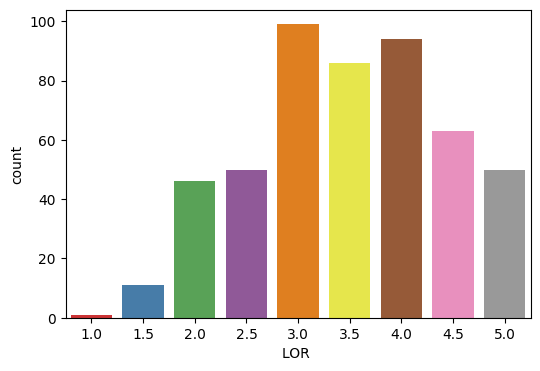

In [ ]:
# LOR Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='LOR ', palette='Set1')
plt.show()

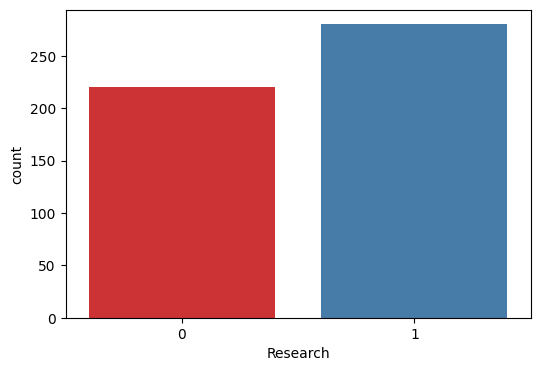

In [ ]:
# Research Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Research', palette='Set1')
plt.show()

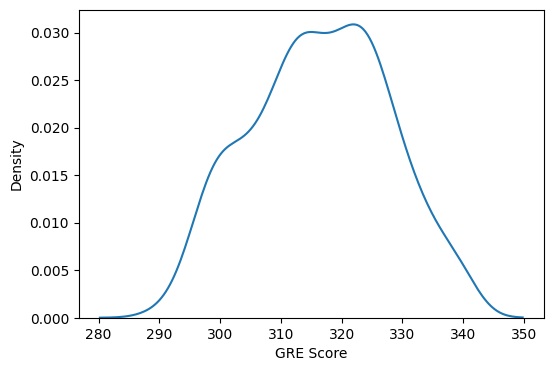

In [ ]:
# GRE Score Analysis
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='GRE Score')
plt.show()

##### As the above diagram looks close to normal distribution so lets check the outliers

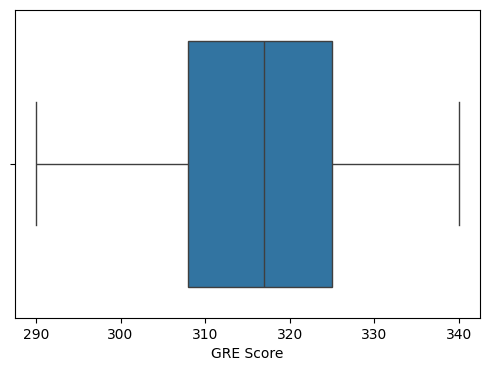

In [ ]:
# Checking Outliers in GRE Score
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='GRE Score')
plt.show()

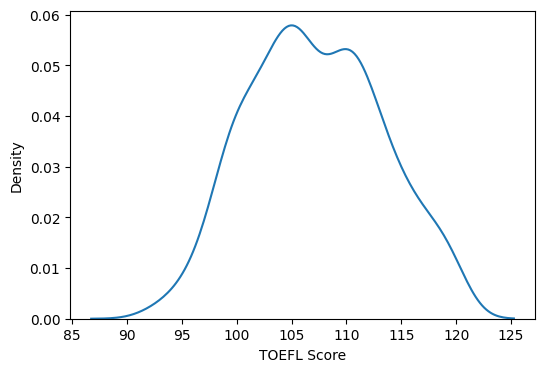

In [ ]:
# TOEFL Score Analysis
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='TOEFL Score')
plt.show()

##### Here also same like above the diagram looks almost normally distributed so lets check outliers.

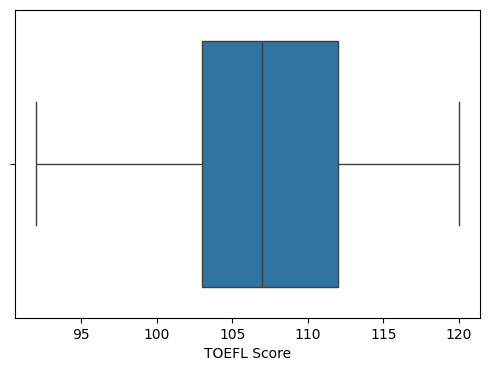

In [ ]:
# Checking Outliers in TOEFL Score
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='TOEFL Score')
plt.show()

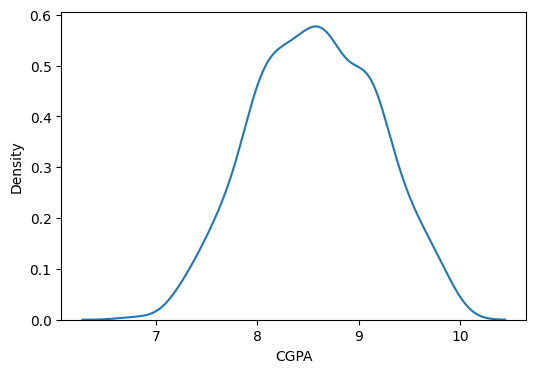

In [ ]:
# CGPA Analysis
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='CGPA')
plt.show()

##### Here the data looks normally Distributed

#### Bivariate Analysis

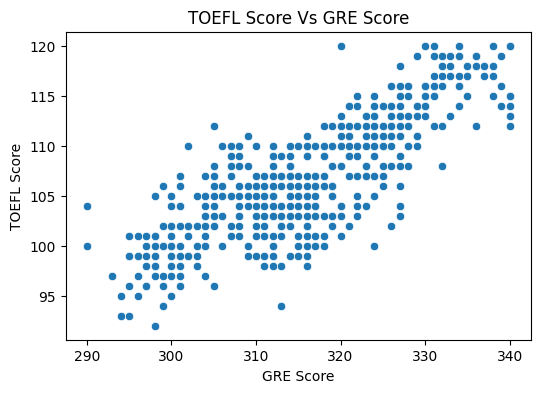

In [52]:
# Analysis on GRE Score and TOEFL Score
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='GRE Score', y='TOEFL Score')
plt.title('TOEFL Score Vs GRE Score')
plt.show()

##### The above Graph Shows Positive correlation which means students who have good GRE Score generally have good TOEFL Score as well.

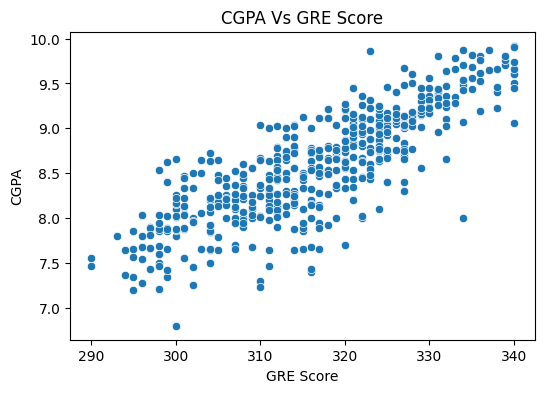

In [53]:
# Analysis on GRE Score and CGPA 
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='GRE Score', y='CGPA')
plt.title('CGPA Vs GRE Score')
plt.show()

##### Here also the graph is showing Positive Correlation which means students who have good CGPA have good GRE Score

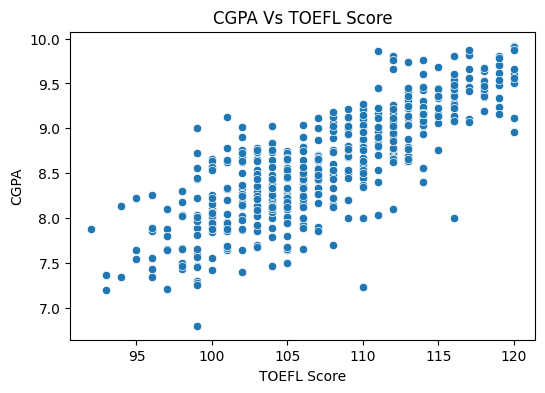

In [54]:
# Analysis on TOEFL Score and CGPA
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='TOEFL Score', y='CGPA')
plt.title('CGPA Vs TOEFL Score')
plt.show()

##### Same like above Students who have good CGPA have good TOEFL Score.

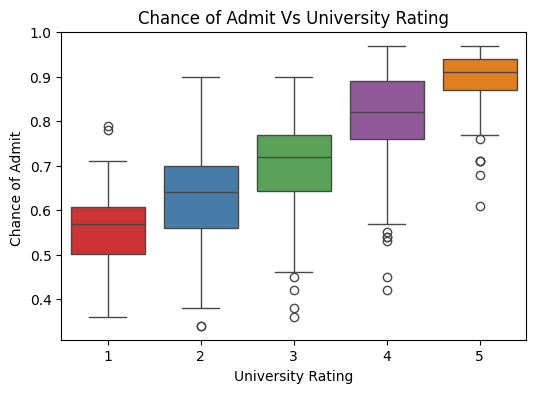

In [64]:
# Analysis on University Rating and Chance of Admit
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='University Rating', y='Chance of Admit ', palette='Set1')
plt.title('Chance of Admit Vs University Rating')
plt.show()

##### University Rating vs Chance of Admit

- Chance of Admit increases with higher University Rating.
- Median and mean admission probability rise consistently from rating 1 to 5.
- This indicates University Rating is a strong predictor of admission chances.

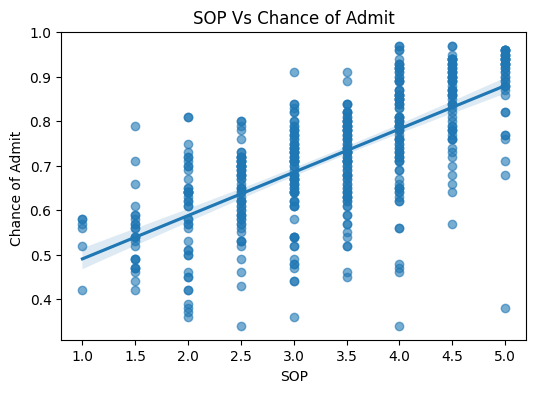

In [60]:
# Analysis on SOP Vs Chance of Admit
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='SOP', y='Chance of Admit ', scatter_kws={'alpha':0.6})
plt.title('SOP Vs Chance of Admit')
plt.show()

##### SOP vs Chance of Admit

- SOP score shows a positive relationship with Chance of Admit.
- Higher SOP scores are associated with higher admission probability.
- Applicants with SOP scores of 4 and above generally have higher chances of admission.

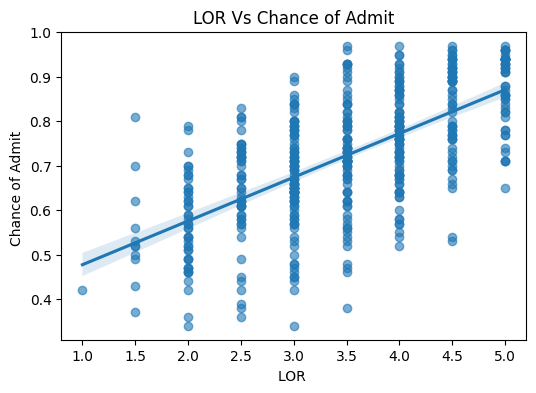

In [62]:
# Analysis on LOR and Chance of Admit
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='LOR ', y='Chance of Admit ', scatter_kws={'alpha':0.6})
plt.title('LOR Vs Chance of Admit')
plt.show()

##### LOR score shows a positive relationship with Chance of Admit, indicating that stronger recommendations are associated with higher admission probability.


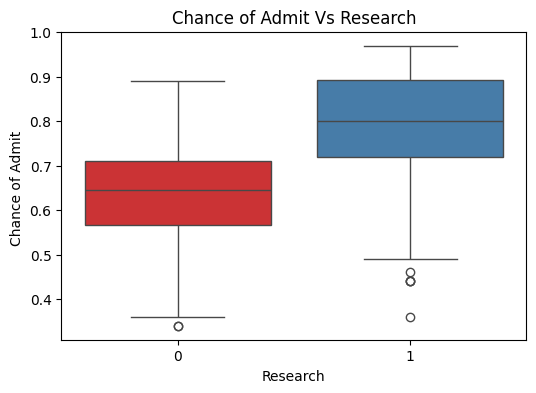

In [65]:
# Analysis on Research and Chance of Admit
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Research', y='Chance of Admit ', palette='Set1')
plt.title('Chance of Admit Vs Research')
plt.show()

##### Research vs Chance of Admit

- Applicants with research experience have a higher median Chance of Admit.
- The distribution for candidates with research is shifted upward compared to those without research.
- This indicates that research experience positively influences admission probability.


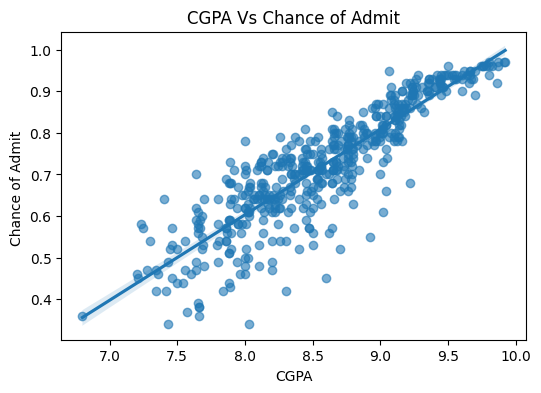

In [66]:
# Analysis on CGPA and Chance of Admit
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='CGPA', y='Chance of Admit ', scatter_kws={'alpha':0.6})
plt.title('CGPA Vs Chance of Admit')
plt.show()

### CGPA vs Chance of Admit

- CGPA shows a strong positive relationship with Chance of Admit.
- Applicants with higher CGPA tend to have significantly higher admission probability.
- The relationship appears approximately linear, indicating CGPA is a strong predictor.

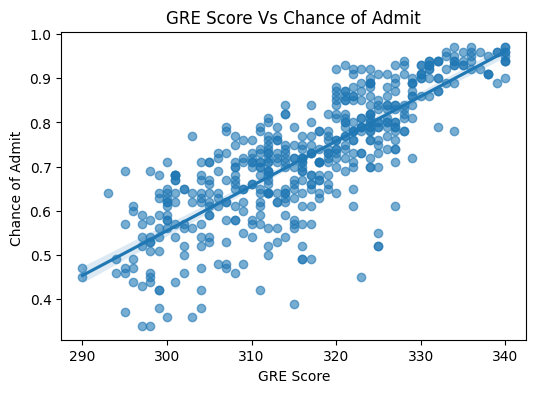

In [67]:
# Analysis on GRE Score and Chance of Admit
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='GRE Score', y='Chance of Admit ', scatter_kws={'alpha':0.6})
plt.title('GRE Score Vs Chance of Admit')
plt.show()

### GRE Score vs Chance of Admit

- GRE score shows a positive relationship with Chance of Admit.
- Applicants with higher GRE scores generally have a higher probability of admission.
- The relationship appears moderately to strongly linear with some variability.

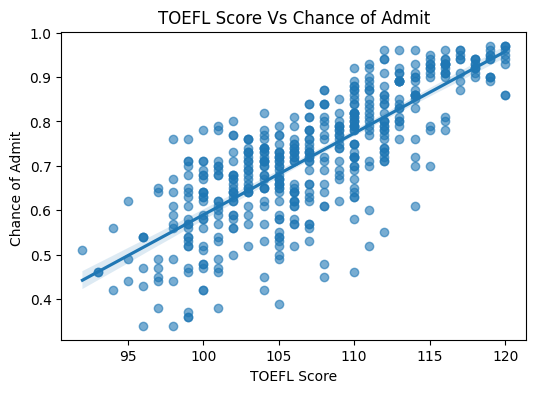

In [68]:
# Analysis on TOEFL Score and Chance of Admit
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='TOEFL Score', y='Chance of Admit ', scatter_kws={'alpha':0.6})
plt.title('TOEFL Score Vs Chance of Admit')
plt.show()

### TOEFL Score vs Chance of Admit

- TOEFL score shows a positive relationship with Chance of Admit.
- Applicants with higher TOEFL scores generally have higher admission probabilities.
- The relationship appears moderately linear, indicating TOEFL is an important predictive feature.

### Bivariate Analysis Summary

- Most academic and profile-related features show a positive relationship with Chance of Admit.
- CGPA, GRE Score, and TOEFL Score exhibit strong positive correlations with the target variable.
- Research experience significantly increases the median Chance of Admit.
- SOP and LOR show moderate positive influence with some variability.
